In [1]:
##kaggle练习1
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

%matplotlib inline

import warnings

warnings.filterwarnings('ignore')

plt.style.use('fivethirtyeight')

/Users/lvsongke/opt/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/Users/lvsongke/opt/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/Users/lvsongke/opt/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/Users/lvsongke/opt/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/Users/lvsongke/opt/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning:

In [3]:
mc_df = pd.read_json('modcloth_final_data.json', lines=True)

mc_df.head()

,item_id,waist,size,quality,cup size,hips,bra size,category,bust,height,user_name,length,fit,user_id,shoe size,shoe width,review_summary,review_text
0,123373,29.0,7,5.0,d,38.0,34.0,new,36,5ft 6in,Emily,just right,small,991571,NaN,NaN,NaN,NaN
1,123373,31.0,13,3.0,b,30.0,36.0,new,NaN,5ft 2in,sydneybraden2001,just right,small,587883,NaN,NaN,NaN,NaN
2,123373,30.0,7,2.0,b,NaN,32.0,new,NaN,5ft 7in,Ugggh,slightly long,small,395665,9.0,NaN,NaN,NaN
3,123373,NaN,21,5.0,dd/e,NaN,NaN,new,NaN,NaN,alexmeyer626,just right,fit,875643,NaN,NaN,NaN,NaN
4,123373,NaN,18,5.0,b,NaN,36.0,new,NaN,5ft 2in,dberrones1,slightly long,small,944840,NaN,NaN,NaN,NaN


In [4]:
mc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82790 entries, 0 to 82789
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   item_id         82790 non-null  int64  
 1   waist           2882 non-null   float64
 2   size            82790 non-null  int64  
 3   quality         82722 non-null  float64
 4   cup size        76535 non-null  object 
 5   hips            56064 non-null  float64
 6   bra size        76772 non-null  float64
 7   category        82790 non-null  object 
 8   bust            11854 non-null  object 
 9   height          81683 non-null  object 
 10  user_name       82790 non-null  object 
 11  length          82755 non-null  object 
 12  fit             82790 non-null  object 
 13  user_id         82790 non-null  int64  
 14  shoe size       27915 non-null  float64
 15  shoe width      18607 non-null  object 
 16  review_summary  76065 non-null  object 
 17  review_text     76065 non-null 

In [6]:
mc_df.isnull().sum()

item_id               0
waist             79908
size                  0
quality              68
cup size           6255
hips              26726
bra size           6018
category              0
bust              70936
height             1107
user_name             0
length               35
fit                   0
user_id               0
shoe size         54875
shoe width        64183
review_summary     6725
review_text        6725
dtype: int64

In [8]:
mc_df.describe().T

,count,mean,std,min,25%,50%,75%,max
item_id,82790.0,469325.229170,213999.803314,123373.0,314980.00,454030.0,658440.00,807722.0
waist,2882.0,31.319223,5.302849,20.0,28.00,30.0,34.00,50.0
size,82790.0,12.661602,8.271952,0.0,8.00,12.0,15.00,38.0
quality,82722.0,3.949058,0.992783,1.0,3.00,4.0,5.00,5.0
hips,56064.0,40.358501,5.827166,30.0,36.00,39.0,43.00,60.0
bra size,76772.0,35.972125,3.224907,28.0,34.00,36.0,38.00,48.0
user_id,82790.0,498849.564718,286356.969459,6.0,252897.75,497913.5,744745.25,999972.0
shoe size,27915.0,8.145818,1.336109,5.0,7.00,8.0,9.00,38.0


<Figure size 1296x648 with 0 Axes>

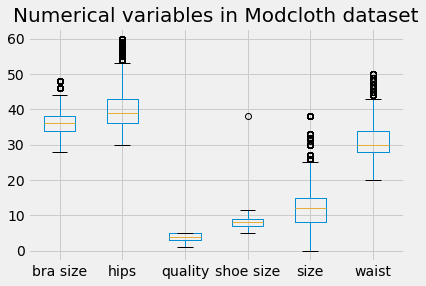

In [12]:
num_cols = ['bra size','hips','quality','shoe size','size','waist']
plt.figure(figsize=(18,9))
mc_df[num_cols].plot(kind='box')
plt.title("Numerical variables in Modcloth dataset", fontsize=20)
plt.show()

In [20]:
mc_df[mc_df.loc[:, 'shoe size'] == 38]

,item_id,waist,size,quality,cup size,hips,bra size,category,bust,height,user_name,length,fit,user_id,shoe size,shoe width,review_summary,review_text
37313,416942,35.0,12,5.0,d,46.0,36.0,new,37-39,5ft 5in,Catslittle,just right,fit,237498,38.0,average,Cardigans are best item Mod Cloth has,"I love these cardigans, my favorite, good fabr..."


In [22]:
mc_df[mc_df.loc[:, 'shoe size'] == 38].loc[:, 'shoe size'] = np.nan

In [24]:
mc_df[mc_df.loc[:, 'shoe size'] == 38].loc[:, 'shoe size'].str = np.nan

In [25]:
mc_df[mc_df.loc[:, 'shoe size'] == 38]

,item_id,waist,size,quality,cup size,hips,bra size,category,bust,height,user_name,length,fit,user_id,shoe size,shoe width,review_summary,review_text
37313,416942,35.0,12,5.0,d,46.0,36.0,new,37-39,5ft 5in,Catslittle,just right,fit,237498,38.0,average,Cardigans are best item Mod Cloth has,"I love these cardigans, my favorite, good fabr..."


In [38]:
mc_df[mc_df.loc[:, 'shoe size'] == 38].loc[:, 'shoe size']

,item_id,waist,size,quality,cup size,hips,bra size,category,bust,height,user_name,length,fit,user_id,shoe size,shoe width,review_summary,review_text


In [36]:
mc_df.loc[37313, 'shoe size'] = None

In [39]:
mc_df.sort_values(['bra size'], ascending=False).head()

,item_id,waist,size,quality,cup size,hips,bra size,category,bust,height,user_name,length,fit,user_id,shoe size,shoe width,review_summary,review_text
73118,753429,NaN,38,3.0,dd/e,NaN,48.0,bottoms,NaN,5ft 4in,Mikki,slightly long,large,93792,NaN,NaN,I probably should have or,"I probably should have ordered a size down, bu..."
80713,796383,NaN,12,4.0,k,60.0,48.0,outerwear,NaN,7ft 11in,bandnerd2522,just right,small,810539,11.5,average,"This jacket is lovely, bu","This jacket is lovely, but I couldn't move my ..."
28901,401773,NaN,38,4.0,dd/e,58.0,48.0,new,NaN,5ft 7in,barretts4jesus,just right,fit,59963,NaN,NaN,Wonderful cardigan. I hav,Wonderful cardigan. I have the honey one as we...
71407,726492,NaN,15,3.0,k,60.0,48.0,bottoms,NaN,7ft 11in,bandnerd2522,slightly short,fit,708288,11.5,average,The pattern is just as lo,"The pattern is just as lovely in person, as in..."
38125,417269,NaN,38,3.0,d,35.0,48.0,new,NaN,5ft 9in,Susan,just right,large,308819,NaN,NaN,I wish I could have gotte,I wish I could have gotten the 3x but it's sti...


In [40]:
mc_df['bra size'].unique()

array([34., 36., 32., nan, 38., 42., 40., 44., 46., 30., 48., 28.])

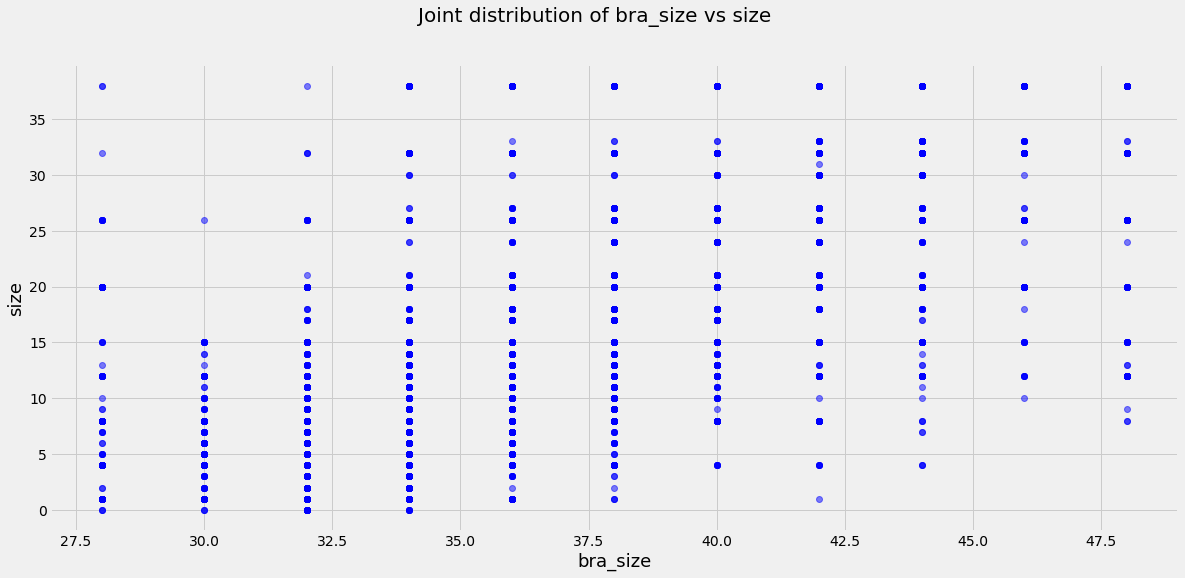

In [41]:
plt.figure(figsize=(18, 8))
plt.xlabel('bra_size', fontsize=18)
plt.ylabel('size', fontsize=18)
plt.suptitle("Joint distribution of bra_size vs size", fontsize= 20)
plt.plot(mc_df['bra size'], mc_df['size'], 'bo', alpha=0.5)
plt.show()

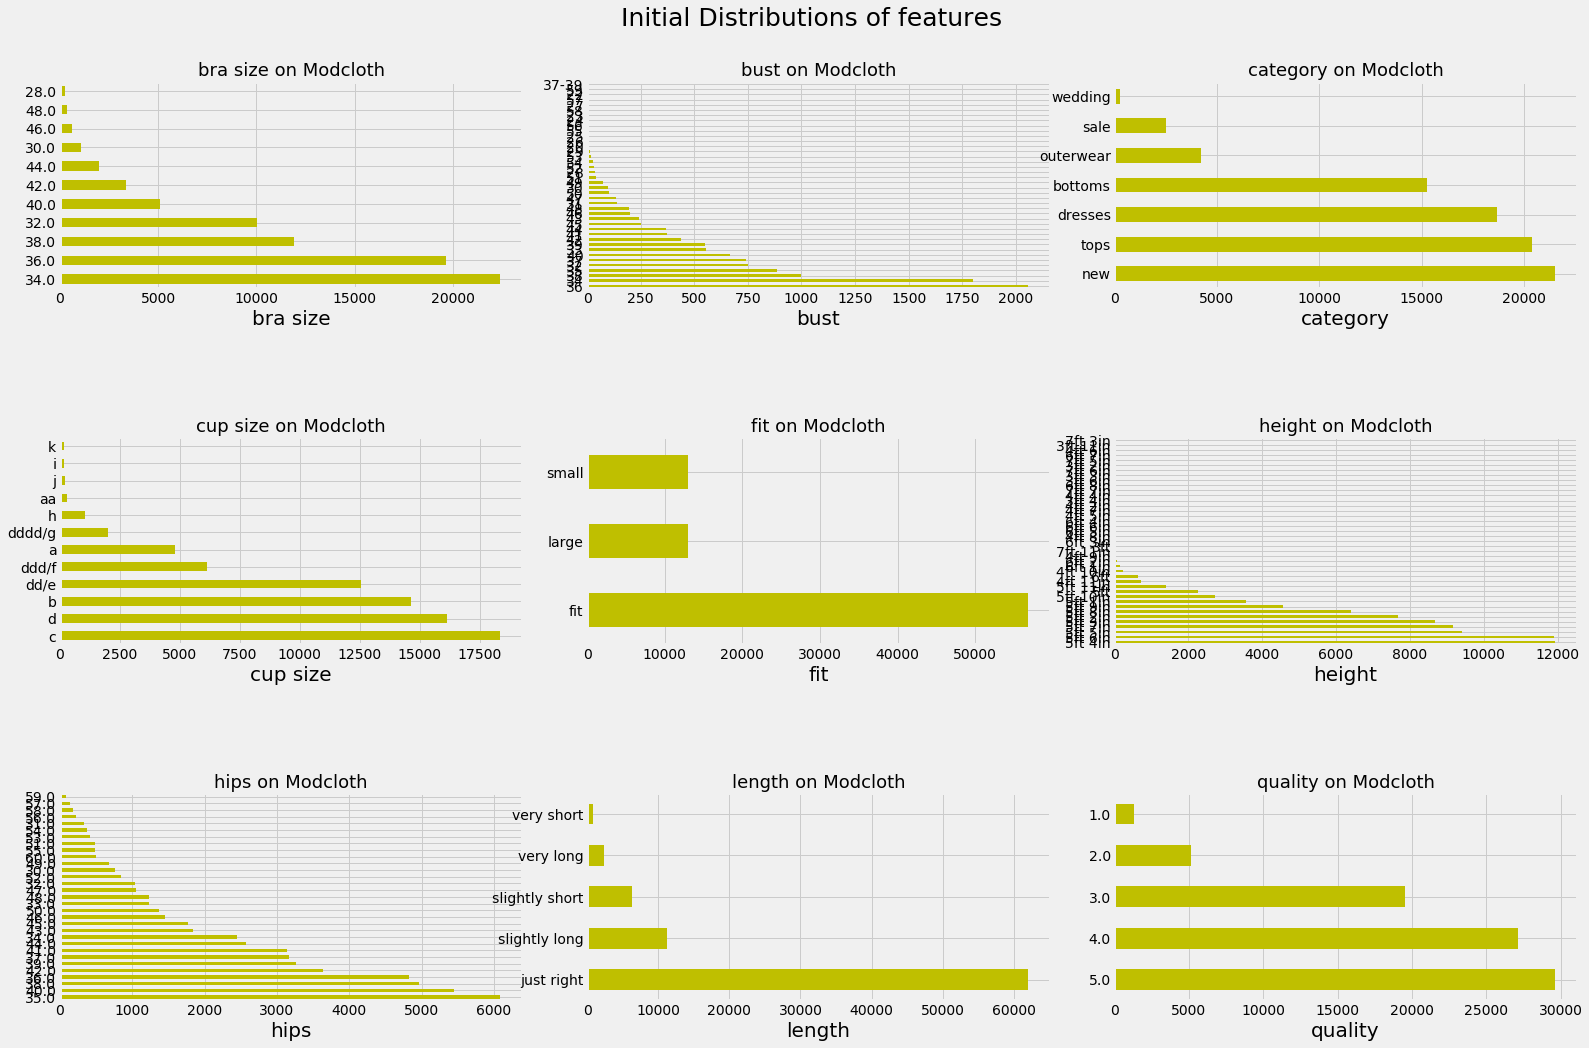

In [45]:
def plot_dist(col, ax):
    mc_df[col][mc_df[col].notnull()].value_counts().plot(kind='barh', facecolor='y', ax=ax)
    ax.set_xlabel('{}'.format(col), fontsize=20)
    ax.set_title("{} on Modcloth".format(col), fontsize= 18)
    return ax

fig, ax = plt.subplots(3,3, figsize=(22,15))
fig.tight_layout(h_pad=9, w_pad=2, rect=[0, 0.03, 1, 0.93])
cols = ['bra size','bust', 'category', 'cup size', 'fit', 'height', 'hips', 'length', 'quality']

k=0
for i in range(3):
    for j in range(3):
        plot_dist(col=cols[k], ax = ax[i][j])
        k += 1
__ = plt.suptitle("Initial Distributions of features", fontsize= 25)

In [47]:
mc_df[['bra size']].isnull().sum()

bra size    6018
dtype: int64

In [50]:
100 * mc_df.isnull().sum()/len(mc_df.index)

item_id            0.000000
waist             96.518903
size               0.000000
quality            0.082136
cup size           7.555260
hips              32.281677
bra size           7.268994
category           0.000000
bust              85.681846
height             1.337118
user_name          0.000000
length             0.042276
fit                0.000000
user_id            0.000000
shoe size         66.283368
shoe width        77.525063
review_summary     8.122962
review_text        8.122962
dtype: float64

In [52]:
mc_df[mc_df['cup size'].isnull()].sample(20)

,item_id,waist,size,quality,cup size,hips,bra size,category,bust,height,user_name,length,fit,user_id,shoe size,shoe width,review_summary,review_text
71505,726492,NaN,12,4.0,NaN,NaN,NaN,bottoms,NaN,5ft 9in,issyskelly,just right,fit,217957,NaN,NaN,"My skirt arrived today, a","My skirt arrived today, and I LOVE it. I was w..."
78093,778687,NaN,8,4.0,NaN,NaN,NaN,new,NaN,NaN,Undisclosed,just right,small,499248,7.0,narrow,Love! Fits almost perfect,Love! Fits almost perfectly but would not go u...
27595,397005,NaN,8,4.0,NaN,NaN,NaN,dresses,NaN,5ft 5in,yvonne.gomez26,slightly short,fit,758825,NaN,NaN,love it! comfy but profes,love it! comfy but professional. I wore with ...
6911,152702,NaN,4,4.0,NaN,NaN,NaN,new,NaN,5ft 4in,mkwerlin,just right,fit,901104,NaN,NaN,High quality and very fla,High quality and very flattering fit on a hour...
51199,539980,NaN,26,3.0,NaN,NaN,NaN,tops,NaN,5ft 10in,katiempink,just right,fit,124637,NaN,NaN,Was sent the wrong size b,Was sent the wrong size but it ended up workin...
74701,756722,NaN,8,3.0,NaN,40.0,NaN,bottoms,NaN,5ft 8in,christeria1.1,just right,fit,759557,NaN,NaN,These are a great staple.,These are a great staple. The waist is high an...
69557,718251,35.0,12,4.0,NaN,46.0,NaN,bottoms,NaN,5ft 4in,Waffle,slightly long,fit,558067,NaN,NaN,New favorite pants,I put these pants on and immediately fell in l...
31369,407134,NaN,20,2.0,NaN,NaN,NaN,new,NaN,5ft 5in,morgancrodgers,just right,fit,835608,NaN,NaN,This is a cozy and quirky,This is a cozy and quirky cardigan. The zipper...
77372,768741,NaN,15,5.0,NaN,NaN,NaN,bottoms,NaN,5ft 4in,Jocelyn,just right,fit,264232,NaN,NaN,Exactly what I was lookin,Exactly what I was looking for. Definitely a s...
58241,647551,NaN,8,3.0,NaN,NaN,NaN,tops,NaN,5ft 4in,alynncarlson,very long,fit,826458,NaN,NaN,It's much longer than i t,It's much longer than i thought based on the p...


In [53]:
mc_df['cup size'].fillna('Unknown', inplace=True)
mc_df['cup size'] = mc_df['cup size'].astype('category').cat.as_ordered()

In [54]:
mc_df['cup size']

0              d
1              b
2              b
3           dd/e
4              b
          ...   
82785          b
82786      ddd/f
82787     dddd/g
82788    Unknown
82789          d
Name: cup size, Length: 82790, dtype: category
Categories (13, object): [Unknown < a < aa < b ... h < i < j < k]

In [56]:
mc_df.fit = mc_df.fit.astype('category')

In [58]:
mc_df.height.head(10)

0     5ft 6in
1     5ft 2in
2     5ft 7in
3         NaN
4     5ft 2in
5     5ft 4in
6     5ft 3in
7     5ft 5in
8    5ft 10in
9     5ft 6in
Name: height, dtype: object

In [59]:
#将height计算单位转为cms
def get_cms(x):
    if type(x) == type(1.0):
        return
    #print(x)
    try: 
        return (int(x[0])*30.48) + (int(x[4:-2])*2.54)
    except:
        return (int(x[0])*30.48)
mc_df.height = mc_df.height.apply(get_cms)

In [60]:
mc_df.height.head(10)

0    167.64
1    157.48
2    170.18
3       NaN
4    157.48
5    162.56
6    160.02
7    165.10
8    177.80
9    167.64
Name: height, dtype: float64

In [65]:
lingerie_cond = (((mc_df['bra size'] != 'Unknown') | (mc_df['cup size'] != 'Unknown')) & (mc_df.height.isnull()) & (mc_df.hips.isnull()) &
     (mc_df['shoe size'].isnull()) & (mc_df['shoe width'].isnull()) & (mc_df.waist.isnull()))
shoe_cond = ((mc_df['bra size'] == 'Unknown') & (mc_df['cup size'] == 'Unknown') & (mc_df.height.isnull()) & (mc_df.hips.isnull()) &
     ((mc_df['shoe size'].notnull()) | (mc_df['shoe width'].notnull())) & (mc_df.waist.isnull()))
dress_cond = ((mc_df['bra size'] == 'Unknown') & (mc_df['cup size'] == 'Unknown') & (mc_df.height.isnull()) & ((mc_df.hips.notnull()) | (mc_df.waist.notnull())) &
     (mc_df['shoe size'].isnull()) & (mc_df['shoe width'].isnull()))
#print(len(mc_df[lingerie_cond]))   # To check if these items add up in the final column we are adding.
#print(len(mc_df[shoe_cond]))
#print(len(mc_df[dress_cond]))
mc_df['first_time_user'] = (lingerie_cond | shoe_cond | dress_cond)
print("Column added!")

Column added!


In [66]:
(((mc_df['bra size'] != 'Unknown') | (mc_df['cup size'] != 'Unknown')) & (mc_df.height.isnull()) & (mc_df.hips.isnull()) &
     (mc_df['shoe size'].isnull()) & (mc_df['shoe width'].isnull()) & (mc_df.waist.isnull()))

0        False
1        False
2        False
3         True
4        False
         ...  
82785    False
82786    False
82787    False
82788    False
82789    False
Length: 82790, dtype: bool